In [1]:
from KNN.modelling import KNN_data_collection as knn
from KNN.modelling import generate_predictions as gp
from KNN.assessment import model_metrics as mm
from KNN.assessment import cross_validation as cv

In [2]:
import numpy as np

**Example 1: KNN classifier using Iris dataset**

*Create model & perform train/test split*

In [3]:
# Create classifier with k=8
iris_classifier=knn.KNN('classifier',8)

Created KNN classifier with k=8!


In [4]:
# Load dataset into classifier and set response variable to "Species"
iris_classifier.load_csv('datasets/Iris.csv','Species')

Dataset successfully loaded!


In [5]:
# Perform a 80/20 train/test split
iris_classifier.train_test_split(0.2)

Successfully completed train/test split!
Training set: 120 samples
Test set: 30 samples


*Generate predictions*

In [6]:
# Generate a prediction using "generate_predictions" module
   # Generate prediction using fit on entire dataset
gp.generate_prediction(iris_classifier,[6.3,2.3,4.4,1.3],'all')

array('Iris-versicolor', dtype=object)

In [7]:
# Generate multiple predictions
   # Generate prediction using fit on training set only
to_predict=np.array([[6.3,2.3,4.4,1.3],[6.8,3.2,5.9,2.3],[4.3,3,1.1,0.1]])
gp.generate_predictions(iris_classifier,to_predict,'all')

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

*Assess model performance for these predictions*

In [8]:
# Compute model accuracy for these 3 hypothetical predictions
mm.model_accuracy(['Iris-virginica', 'Iris-virginica', 'Iris-setosa'],gp.generate_predictions(iris_classifier,to_predict,'all'))

0.6666666666666666

In [9]:
# Compute model misclassification rate for these 3 hypothetical predictions
mm.model_misclassification(['Iris-virginica', 'Iris-virginica', 'Iris-setosa'],gp.generate_predictions(iris_classifier,to_predict,'all'))

0.3333333333333333

In [36]:
# Check number correct
mm.model_num_correct(['Iris-virginica', 'Iris-virginica', 'Iris-setosa'],gp.generate_predictions(iris_classifier,to_predict,'all'))

2

In [37]:
# Check number incorrect
mm.model_num_incorrect(['Iris-virginica', 'Iris-virginica', 'Iris-setosa'],gp.generate_predictions(iris_classifier,to_predict,'all'))

1

*Assess model performance on test set*

In [10]:
mm.assessment_metrics(iris_classifier)

Test accuracy: 0.8333333333333334
Test misclassification rate: 0.16666666666666666
Num correct predictions: 25
Num incorrect predictions: 5


/Users/ericphillips/ubc_mds/data_533/knn/KNN/modelling/generate_predictions.py:27: UserWarning: Warning: A tie has occurred (top two classes in K nearest neighbors have the same number of occurances). Classification depends on the order of the training data.
  warnings.warn('Warning: A tie has occurred (top two classes in K nearest neighbors have the same number of occurances). Classification depends on the order of the training data.')


In [ ]:
## Above warning indicates that a tie occurred while generating test set predictions
   # This is explained by our choice of an even number for k

*Tune k hyperparameter using 6-fold cross validation*

In [11]:
# Create CV instance for 6-fold CV
iris_cv=cv.CvKNN('classifier',6)

Created CV instance for KNN classifier with 6 folds!


In [12]:
# Load dataset into CV instance and set response variable to "Species"
iris_cv.load_csv('datasets/Iris.csv','Species')
# Perform 80/20 train/test split
iris_cv.train_test_split(0.2)

Dataset successfully loaded!
Successfully completed train/test split!
Training set: 120 samples
Test set: 30 samples


In [17]:
# Perform 6-fold CV for k values 1 through 10
iris_cv.perform_cv(np.arange(1,11))

Successfully performed 6 CV!


k=1: 0.041666666666666664
k=2: 0.05833333333333334
k=3: 0.05000000000000001
k=4: 0.041666666666666664
k=5: 0.03333333333333333
k=6: 0.041666666666666664
k=7: 0.05000000000000001
k=8: 0.05000000000000001
k=9: 0.075
k=10: 0.08333333333333333


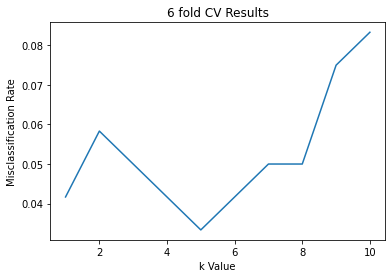

In [18]:
# Examine CV results
iris_cv.get_cv_results()

In [19]:
# Get best K
   # This sets "k" instance attribute to allow for assessment on test set using tuned k
iris_cv.get_best_k()

Best k: 5
CV Misclassification Rate: 0.03333333333333333


In [20]:
# Examine classifier performance on test set using tuned k hyperparameter
mm.assessment_metrics(iris_cv)

Test accuracy: 0.8666666666666667
Test misclassification rate: 0.13333333333333333
Num correct predictions: 26
Num incorrect predictions: 4


In [21]:
# 6-fold CV indicated we should change our k hyperparameter from 8 to 5
   # Improved model test accuracy by 3.33%

**Example 2: KNN regressor using auto_mpg dataset**

*Create model and perform train/test split*

In [22]:
# Create classifier with k=7
mpg_regressor=knn.KNN('regressor',7)

Created KNN regressor with k=7!


In [24]:
# Load dataset into regressor and set response variable to 'mpg'
mpg_regressor.load_csv('datasets/auto_mpg.csv','mpg')

Dataset successfully loaded!


In [25]:
# Perform 75/25 train/test split
mpg_regressor.train_test_split(0.25)

Successfully completed train/test split!
Training set: 294 samples
Test set: 98 samples


*Generate predictions*

In [53]:
# Generate single prediction from fit on full set
gp.generate_prediction(mpg_regressor,[6,250,100,3282,15],'all')

18.957142857142856

In [54]:
# Generate multiple predictions from fit on training set
mpg_to_predict=np.array([[6,250,100,3282,15],[6,250,88,3139,14.5],
                        [4,122,86,2220,14],[4,116,90,2123,14]])
gp.generate_predictions(mpg_regressor,mpg_to_predict,'train')

array([18.64285714, 17.98571429, 31.18571429, 29.94285714])

In [55]:
# Assess model performance on these 4 values
actual_mpg=[19,18,23,28]
predicted_mpg=gp.generate_predictions(mpg_regressor,mpg_to_predict,'train')

In [56]:
# Compute RMSE, MSE, MAPE, MAE
print('Root mean squared error')
print(mm.model_rmse(actual_mpg,predicted_mpg))
print('Mean squared error')
print(mm.model_mse(actual_mpg,predicted_mpg))
print('Mean absolute percent error')
print(mm.model_mape(actual_mpg,predicted_mpg))
print('Mean absolute error')
print(mm.model_mae(actual_mpg,predicted_mpg))

Root mean squared error
4.210355310034379
Mean squared error
17.727091836734697
Mean absolute percent error
11.121975487372675
Mean absolute error
2.625


*Assess model performance on test set*

In [38]:
mm.assessment_metrics(mpg_regressor)

Test MSE: 20.935974593919205
Test RMSE: 4.575584617720364
Test MAE: 3.3689504373177845
Test MAPE: 14.555844306759363%


*Tune k hyperparameter using 8-fold cross validation*

In [39]:
# Create CV instance for 8-fold CV
mpg_cv=cv.CvKNN('regressor',8)

Created CV instance for KNN regressor with 8 folds!


In [40]:
# Load dataset into CV instance and set response variable to "mpg"
mpg_cv.load_csv('datasets/auto_mpg.csv','mpg')
# Perform 75/25 train/test split
mpg_cv.train_test_split(0.2)

Dataset successfully loaded!
Successfully completed train/test split!
Training set: 314 samples
Test set: 78 samples


In [41]:
# Perform 8-fold CV using k values 2-12
mpg_cv.perform_cv(np.arange(2,13))

Successfully performed 8 CV!


k=2: 23.49831730769231
k=3: 22.150797720797723
k=4: 22.0321875
k=5: 20.7240782051282
k=6: 20.700193198005696
k=7: 20.746401753008897
k=8: 21.00656650641026
k=9: 20.92890115542893
k=10: 20.67497884615385
k=11: 20.359530356007628
k=12: 20.526462784900286


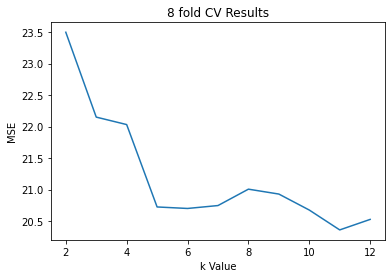

In [43]:
# Examine CV results
mpg_cv.get_cv_results()

In [45]:
# Get best K
   # This sets "k" instance attribute to allow for assessment on test set using tuned k
mpg_cv.get_best_k()

Best k: 11
CV MSE: 20.359530356007628


In [46]:
# Examine regressor performance on test set using tuned k hyperparameter
mm.assessment_metrics(mpg_cv)

Test MSE: 17.984278448823908
Test RMSE: 4.240787479799466
Test MAE: 3.0834498834498842
Test MAPE: 12.740852558555368%


In [47]:
# 8-fold CV indicated we should change our k hyperparameter from 7 to 11
  # Improved model test MSE by ~3, test MAE by ~0.3

In [48]:
# Re-compute earlier predictions using tuned KNN regressor
gp.generate_predictions(mpg_cv,mpg_to_predict,'all')

array([18.79090909, 18.51818182, 28.3       , 30.82727273])

In [57]:
# Assess model performance on these 4 values
new_predicted_mpg=gp.generate_predictions(mpg_cv,mpg_to_predict,'all')

In [58]:
# Compute RMSE, MSE, MAPE, MAE
print('Root mean squared error')
print(mm.model_rmse(actual_mpg,new_predicted_mpg))
print('Mean squared error')
print(mm.model_mse(actual_mpg,new_predicted_mpg))
print('Mean absolute percent error')
print(mm.model_mape(actual_mpg,new_predicted_mpg))
print('Mean absolute error')
print(mm.model_mae(actual_mpg,new_predicted_mpg))

Root mean squared error
3.016442543764876
Mean squared error
9.098925619834715
Mean absolute percent error
9.280036801489896
Mean absolute error
2.2136363636363647


In [59]:
# Tuned regressor achieves better performance for these 4 values